In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train = data_train.dropna()

In [5]:
encoder = LabelEncoder()
X_names = ['Sex','Age','SibSp','Parch','Fare','Embarked'] #'Age'
y_names = ['Survived']

In [6]:
X = data_train[X_names]
y = data_train[y_names]

In [25]:
X.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,38.0,1,0,71.2833,0
3,0,35.0,1,0,53.1000,2
6,1,54.0,0,0,51.8625,2
10,0,4.0,1,1,16.7000,2
11,0,58.0,0,0,26.5500,2


In [26]:
y.head()

,Survived
1,1
3,1
6,0
10,1
11,1


In [7]:
encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

In [8]:
from sklearn.impute import SimpleImputer, KNNImputer

#imputer = SimpleImputer(strategy='mean')
#imputer = KNNImputer(n_neighbors=10)
#X_imputed = imputer.fit_transform(X.to_numpy())
#X['Age'] = X_imputed
#X_imputed

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
#mask = X.isnull()
#rows_with_nan = X[mask.any(axis=1)]
#print(X.shape)
#print(len(rows_with_nan))
#print(rows_with_nan)

In [62]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

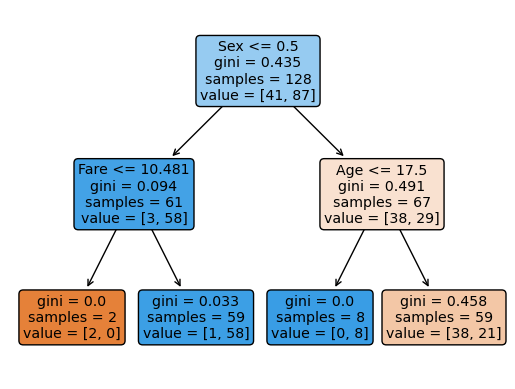

In [63]:
fig = plot_tree(model, 
          feature_names = X_names, 
          filled = True, 
          rounded = True)

In [64]:
y_pred = model.predict(X_test)

In [65]:
k = 10
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.25)
Precision: 0.92 (+/- 0.15)
Recall: 0.72 (+/- 0.37)


In [66]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
k = 10
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.17)
Precision: 0.81 (+/- 0.07)
Recall: 0.82 (+/- 0.30)
